In [6]:
import pandas as pd
from Builder_tools.Unit_tools import Inference, VGG_model_regression, VGG_model_classification
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

## ИЗМЕРЯЕМ СКОРОСЬ РАБОТЫ МОДЕЛЕЙ

### 1.1. Model VGGFace с архитектурой ResNet50 - классификатор

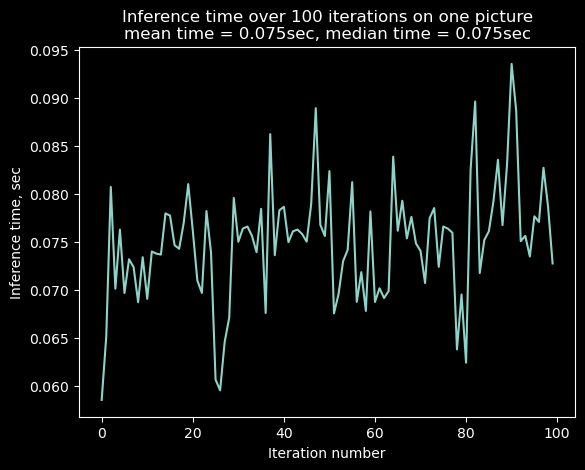

(0.07490139722824096, 0.07527077198028564)

In [8]:
# Определяем обьект Inference
vgg_res50_class = Inference(inference_mode='img', show_state_mode='inline')
vgg_res50_class._benchmark_frame("./train/happy/300.jpg")


### 1.2. Model VGGFace с архитектурой VGG16 - классификатор

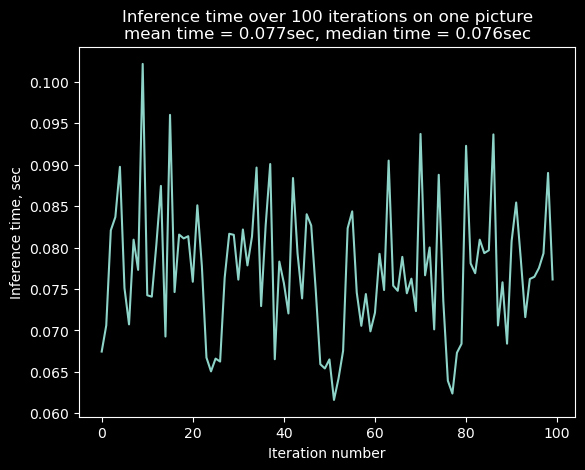

(0.07718871116638183, 0.07641112804412842)

In [10]:
# Определяем обьект Inference
vgg16_class = Inference(inference_mode='img', show_state_mode='inline')
#Переопределим модель в обьекте Inference, и функцию препроцессинга
vgg16_class.model_obj = VGG_model_classification(
    path_to_model='./saved_models/VGG16')
#Тестим модель
vgg16_class._benchmark_frame("./train/happy/300.jpg")

### 1.3. Model VGGFace с архитектурой VGG16 - регрессор

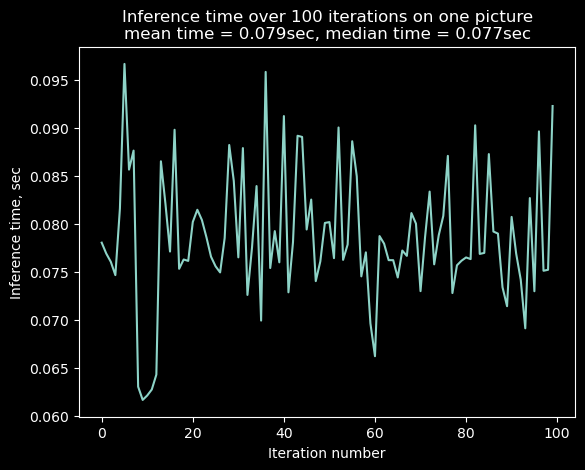

(0.078615562915802, 0.07719147205352783)

In [11]:
# Определяем обьект инференса
vgg16_reg = Inference(inference_mode = 'img', show_state_mode='inline')
# Переопределяем модель
vgg16_reg.model_obj = VGG_model_regression()
#Тестим модель
vgg16_reg._benchmark_frame("./train/happy/300.jpg")

## ИНФЕРЕНС

### На примере VGGFace с архитектурой ResNet50 - классификатор

I0000 00:00:1707851167.285907    5815 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1707851167.304115  136656 gl_context.cc:344] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.154.05), renderer: NVIDIA GeForce RTX 2060/PCIe/SSE2


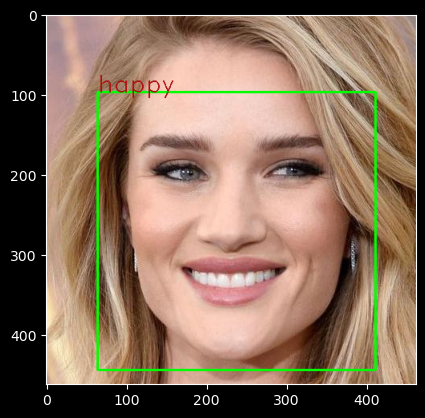

In [12]:
### Инференс для изображений
vgg_res50_class = Inference(inference_mode='img', show_state_mode='inline')
vgg_res50_class.go("./train/happy/331.jpg")

In [ ]:
### Инференс для работы с вебкамерой онлайн
vgg_res50_class = Inference(inference_mode='online')
vgg_res50_class.go()

In [ ]:
### Инференс для работы с видеофайлами, без записи
vgg_res50_class = Inference(inference_mode='video')
vgg_res50_class.go(path_to_data='./')

In [ ]:
### Инференс для работы с видеофайлами, с записью
vgg_res50_class = Inference(inference_mode='video_rec')
vgg_res50_class.go(path_to_data='./', path_save_data='./')

In [ ]:
### Инференс для работы с группой изображений (Результаты мы отправим на каггле)
vgg_res50_class = Inference()
# В случае такого инференса, обьект возвращает 2 списка - id изображения, предсказания
id_img, predict = vgg_res50_class._img_batch_inf(path_img='./test_kaggle/')

In [ ]:
# Формируем датафрейм и сохраняем его в формате csv
out_pd = pd.DataFrame({
    'image_path': id_img,
    'emotion':predict
})
out_pd.to_csv('sample_submission_ResNET50.csv', index=False)

In [ ]:
### Инференс для работы с группой изображений (Результаты мы отправим на каггле)
vgg16_class = Inference()
vgg16_class.model_obj = VGG_model_classification(
    path_to_model='./saved_models/VGG16')
# В случае такого инференса, обьект возвращает 2 списка - id изображения, предсказания
id_img, predict = vgg16_class._img_batch_inf(path_img='./test_kaggle/')

In [6]:
# Формируем датафрейм и сохраняем его в формате csv
out_pd = pd.DataFrame({
    'image_path': id_img,
    'emotion':predict
})
out_pd.to_csv('sample_submission_VGG16.csv', index=False)

In [ ]:
### Инференс для работы с группой изображений (Результаты мы отправим на каггле)
vgg16_reg = Inference()
vgg16_reg.model_obj = VGG_model_regression()
# В случае такого инференса, обьект возвращает 2 списка - id изображения, предсказания
id_img, predict = vgg16_reg._img_batch_inf(path_img='./test_kaggle/')

In [4]:
# Формируем датафрейм и сохраняем его в формате csv
out_pd = pd.DataFrame({
    'image_path': id_img,
    'emotion':predict
})
out_pd.to_csv('sample_submission_VGG16_reg.csv', index=False)
